# Random Forest - Heart Disease Health Indicators Dataset
## G8

Importing the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV


Load dataset


In [ ]:
datafile = "heart_disease_health_indicators_BRFSS2015.csv"
df = pd.read_csv(datafile)
labels = (df['HeartDiseaseorAttack'] == 1.0)
features = df.drop(['HeartDiseaseorAttack'], axis=1) # Extracting features by dropping the 'HeartDiseaseorAttack' column

## Handling unbalanced data

In [ ]:
random_sampler = RandomOverSampler() # Using RandomOverSampler to address class imbalance in the dataset
features_resampled, labels_resampled = random_sampler.fit_resample(features, labels) # Resampling the features and labels to balance the class distribution

##Split Dataset for Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42) #Splitting Dataset into Training and Testing

## Train Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)


##Use GridSearchCV to find the best hyperparameters

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model_rf, param_grid, cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print(best_params)
print(best_model)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50, random_state=42)


##Modeling (Random Forest)

In [ ]:
# Train the best model
best_model.fit(X_train, y_train) # add the best hypermeters

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(best_model, 'random_forest_model.joblib')  # You can choose any filename you prefer

# Load the model back into memory
loaded_rf_model = joblib.load('random_forest_model.joblib')

# Use the loaded model to make predictions
y_pred = loaded_rf_model.predict(x_test)

###Model evaluation

In [ ]:
# Evaluation metrics for random forest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Evaluation Metrics:
Accuracy: 0.9707991078714029
Precision: 0.9463894514942339
Recall: 0.9980384464495881
F1 Score: 0.9715279840454872


Confusion Matrix:
[[43439  2594]
 [   90 45792]]


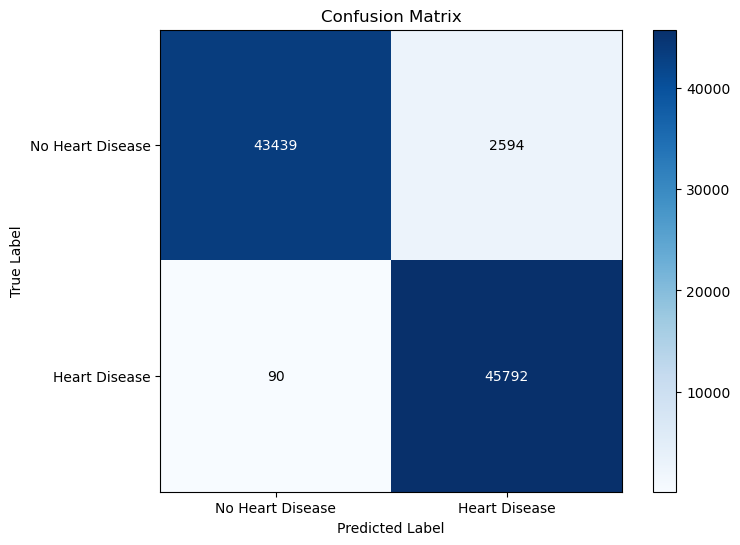

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No Heart Disease', 'Heart Disease']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2.0 else 'black')

plt.show()